In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd

## bands information

https://gisgeography.com/sentinel-2-bands-combinations/

similar gradient appearing in all bands

=> some normalization help like ndvi


In [2]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))
    
# print(img.width)
# print(img.height)

## NDVI

In [3]:
# # compute ndvi
# ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))

# show(ndvi)

In [4]:
# ndvi.shape

In [5]:
# np.median(ndvi)

In [6]:
# ndvi_ = np.nan_to_num(ndvi, nan=-1)
# ndvi_values =np.array([x for x in ndvi_.flatten() if x != -1])
# ndvi_values.mean(),ndvi_values.var()

In [7]:
# ndvi_.flatten()

## moisture index

In [8]:
# # moisture index
# mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))

# show(mi)

In [9]:
# mi

# Visualize Data Rice Fields

In [10]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))
    
# print(img.width)
# print(img.height)


In [11]:
# img.count

In [12]:
# img.read(8)

In [13]:
# array = img.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})

In [14]:
# stats

In [15]:
# import matplotlib.pyplot as plt
# plt.hist(img.read().flatten(), alpha = 1)

In [16]:
# from rasterio.plot import show_hist
# show_hist(img, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

In [17]:
# band4= img.read(4)

In [18]:
# band4.shape

# SugarCane Visualization

In [19]:
# fp = r'../raw_data/sugarcane/id_6054a1b558a7cd00480009c8_all_bands_2020-07-03.tif'
# sugar_cane = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(sugar_cane.read(i))
    
# print(sugar_cane.width)
# print(sugar_cane.height)

In [20]:
# sugar_cane.count

In [21]:
# array = sugar_cane.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})
# stats

In [22]:
# sugar_cane.read(8).flatten()

In [23]:
# import matplotlib.pyplot as plt
# plt.hist(sugar_cane.read().flatten(), alpha = 1)

In [24]:
# from rasterio.plot import show_hist
# show_hist(sugar_cane, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

In [25]:
def create_dataset(folders, n = None): 
    X = []
    y = []
    dates =[]
    file_ids = []
    
    for folder in folders:
        files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
        if n is None:
            n = len(files_s)
        for file in files_s[:n]:
            filename = os.path.basename(f"../raw_data/{folder}/{file}")
            file_id, date = filename.split('_all_bands_')
            date = date.replace('.tif','')
    
            img = rasterio.open(file)
            b_dict = {'date':date,'file_id':file_id,'target': folder}
            
            for band in range(1,13):
                b_dict[f'b{band}'] = img.read(band).flatten()
            X.append(b_dict)      
            img.close()
    df = pd.DataFrame(X) 
#     ndvi = (img.read(df.b8)-img.read(df.b4))/(img.read(df.b8) + img.read(df.b4))
#     df[ndvi_mean] = ndvi.mean()
    return df

In [26]:
folders = ['rice_1y', 'sugarcane']
df = create_dataset(folders) #n = 5
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ..."
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58..."
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...","[0, 0, 0, 0, 0, 0, 3968, 3610, 3296, 3078, 309...","[0, 0, 0, 0, 0, 0, 3917, 3917, 3546, 354

In [27]:
def computeNdvi_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)

    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)

    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_mean = ndvi_values.mean()
    return ndvi_mean

In [28]:
df['ndvi_mean']= pd.DataFrame(df.apply(lambda row : computeNdvi_mean(row), axis = 1))
df

<ipython-input-27-dada7b1cc39e>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...","[0, 0, 0, 0, 0, 0, 3968, 3610, 32

In [29]:
def computeNdvi_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)

    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)

    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_median = np.median(ndvi_values)
    
    return ndvi_median

In [30]:
df['ndvi_median']= pd.DataFrame(df.apply(lambda row : computeNdvi_median(row), axis = 1))
df

<ipython-input-29-39abd703965e>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750,

In [31]:
def computeNdvi_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)

    ndvi = (row.b8-row.b4)/(row.b8 + row.b4)

    ndvi_ = np.nan_to_num(ndvi, nan=-1)
    ndvi_values =np.array([x for x in ndvi_ if x != -1])
    ndvi_std = np.std(ndvi_values)
    
    return ndvi_std

In [32]:
df['ndvi_std']= pd.DataFrame(df.apply(lambda row : computeNdvi_std(row), axis = 1))
df

<ipython-input-31-c575dfd3ce0f>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (row.b8-row.b4)/(row.b8 + row.b4)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0,

In [33]:
def computeMi(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_mean = mi_values.mean()
    return mi_mean

In [34]:
df['mi_mean']= pd.DataFrame(df.apply(lambda row : computeMi(row), axis = 1))
df

<ipython-input-33-369db7a88a25>:5: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 

In [35]:
def computeMi_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_median = np.median(mi_values)
    return mi_median
df['mi_median']= pd.DataFrame(df.apply(lambda row : computeMi_median(row), axis = 1))
df

<ipython-input-35-ce2f3b5c50b2>:5: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0,

In [36]:
def computeMi_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    mi = (row.b8-row.b11)/(row.b8 + row.b11)
    mi_ = np.nan_to_num(mi, nan=-1)
    mi_values =np.array([x for x in mi_.flatten() if x != -1])
    mi_median = np.median(mi_values)
    return mi_median
df['mi_std']= pd.DataFrame(df.apply(lambda row : computeMi_std(row), axis = 1))
df

<ipython-input-36-4234a4c35070>:5: RuntimeWarning: invalid value encountered in true_divide
  mi = (row.b8-row.b11)/(row.b8 + row.b11)


,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b9,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 32

In [37]:
def computeCombo1(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_1 = row.b7 + row.b6 + row.b4

    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_mean = bc1_values.mean()
    
    return bc1_mean

df['Cb1_mean']= pd.DataFrame(df.apply(lambda row : computeCombo1(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b10,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...",...,"[0, 0, 0, 0, 0, 0, 5647, 5647, 5647, 5647, 548...","[0, 0, 0, 0, 0, 0, 3310, 3310, 3048, 3048, 302...","[0, 0, 0, 0, 0, 0, 2414, 2414, 2177, 2177, 214...",0.340068,0.34553

In [38]:
def computeCombo1_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_1 = row.b7 + row.b6 + row.b4

    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_median = np.median(bc1_values)
    
    return bc1_median

df['Cb1_median']= pd.DataFrame(df.apply(lambda row : computeCombo1_median(row), axis = 1))
df



,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b11,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...",...,"[0, 0, 0, 0, 0, 0, 3310, 3310, 3048, 3048, 302...","[0, 0, 0, 0, 0, 0, 2414, 2414, 2177, 2177, 214...",0.340068,0.345532,0.050042,4.854768,0.090409,0.090409,5681.307479,7805.0
3308,2020-12-05,id_6054a1b558a7cd00480009b6,sugarcane,"[0, 538, 538, 538, 538, 538, 532, 532, 0, 0, 0...","[0, 1134, 1200, 1132, 1112, 1036, 1002, 901, 0...","[0, 1464, 1446, 1342, 1206, 1192, 1184, 1170, ...","[0, 138

In [39]:
def computeCombo1_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_1 = row.b7 + row.b6 + row.b4

    bc1_ = np.nan_to_num(band_combo_1, nan=-1)
    bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
    bc1_std = np.std(bc1_values)
    
    return bc1_std

df['Cb1_std']= pd.DataFrame(df.apply(lambda row : computeCombo1_std(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,b12,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ...",0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58...",0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...",...,"[0, 0, 0, 0, 0, 0, 2414, 2414, 2177, 2177, 214...",0.340068,0.345532,0.050042,4.854768,0.090409,0.090409,5681.307479,7805.0,3855.056149
3308,2020-12-05,id_6054a1b558a7cd00480009b6,sugarcane,"[0, 538, 538, 538, 538, 538, 532, 532, 0, 0, 0...","[0, 1134, 1200, 1132, 1112, 1036, 1002, 901, 0...","[0, 1464, 1446, 1342, 1206, 1192, 1184, 1170, ...","[0, 1382, 1378, 1318, 1284, 1232, 1222, 1182, ...","[0, 1404, 1397, 1397, 1412, 1412, 1438, 1438, ...","[0, 2166, 2189, 2189, 2161, 2161, 2090, 2090, ...","[0, 2597, 2543, 2543, 2389, 2389, 2310, 2310, ...",...,"[0, 1389, 1485, 1485, 1557, 155

In [40]:
def computeCombo2_mean(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_mean= bc2_values.mean()

    return bc2_mean

df['Cb2_mean']= pd.DataFrame(df.apply(lambda row : computeCombo2_mean(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.479770,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.024270,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,0.515295,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,0.163137,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.042841,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...",...,0.340068,0.345532,0.050042,4.854768,0.090409,0.090409,5681.307479,7805.0,3855.056149,5596.171745
3308,2020-12-05,id_6054a1b558a7cd00480009b6,sugarcane,"[0, 538, 538, 538, 538, 538, 532, 532, 0, 0, 0...","[0, 1134, 1200, 1132, 1112, 1036, 1002, 901, 0...","[0, 1464, 1446, 1342, 1206, 1192, 1184, 1170, ...","[0, 1382, 1378, 1318, 1284, 1232, 1222, 1182, ...","[0, 1404, 1397, 1397, 1412, 1412, 1438, 1438, ...","[0, 2166, 2189, 2189, 2161, 2161, 2090, 2090, ...","[0, 2597, 2543, 2543, 2389, 2389, 2310, 2310, ...",...,0.552570,0.605832,0.132644,1.674060,0.180894,0.180894,3948.891026,5733.0,2871.324692,3738.048077
3309,2021-02-08,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 1193, 1193, 1193, 1203, 1203, 0, 0, 0, ...","[0, 0, 1292, 1284, 1284, 1284, 1312, 0, 0, 0, ...","[0, 0, 1456

In [41]:
def computeCombo2_median(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_median= np.median(bc2_values)

    return bc2_median

df['Cb2_median']= pd.DataFrame(df.apply(lambda row : computeCombo2_median(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.496448,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.023761,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,0.505023,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,0.158295,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.042198,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...",...,0.345532,0.050042,4.854768,0.090409,0.090409,5681.307479,7805.0,3855.056149,5596.171745,7737.0
3308,2020-12-05,id_6054a1b558a7cd00480009b6,sugarcane,"[0, 538, 538, 538, 538, 538, 532, 532, 0, 0, 0...","[0, 1134, 1200, 1132, 1112, 1036, 1002, 901, 0...","[0, 1464, 1446, 1342, 1206, 1192, 1184, 1170, ...","[0, 1382, 1378, 1318, 1284, 1232, 1222, 1182, ...","[0, 1404, 1397, 1397, 1412, 1412, 1438, 1438, ...","[0, 2166, 2189, 2189, 2161, 2161, 2090, 2090, ...","[0, 2597, 2543, 2543, 2389, 2389, 2310, 2310, ...",...,0.605832,0.132644,1.674060,0.180894,0.180894,3948.891026,5733.0,2871.324692,3738.048077,5539.0
3309,2021-02-08,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 1193, 1193, 1193, 1203, 1203, 0, 0, 0, ...","[0, 0, 1292, 1284, 1284, 1284, 1312, 0, 0, 0, ...","[0, 0, 1456, 1464, 1464, 1470

In [42]:
def computeCombo2_std(row):
    fp = f'../raw_data/{row.target}/{row.file_id}_all_bands_{row.date}.tif'
    img = rasterio.open(fp)
    
    band_combo_2 = row.b11 + row.b8 + row.b2
    bc2_ = np.nan_to_num(band_combo_2, nan=-1)
    bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
    bc2_std= np.std(bc2_values)

    return bc2_std

df['Cb2_std']= pd.DataFrame(df.apply(lambda row : computeCombo2_std(row), axis = 1))
df

,date,file_id,target,b1,b2,b3,b4,b5,b6,b7,...,ndvi_std,mi_mean,mi_median,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_1y,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.059450,0.893525,0.160805,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.004722,0.324392,0.324265,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_1y,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...",...,0.039212,0.278630,0.272507,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_1y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...",...,0.058246,0.330438,0.378871,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_1y,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,0.011207,0.457259,0.458932,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,sugarcane,"[0, 0, 0, 0, 0, 0, 1648, 1648, 1648, 1648, 121...","[0, 0, 0, 0, 0, 0, 1968, 1466, 1406, 1270, 119...","[0, 0, 0, 0, 0, 0, 2372, 1802, 1686, 1552, 141...","[0, 0, 0, 0, 0, 0, 2330, 1750, 1776, 1676, 145...","[0, 0, 0, 0, 0, 0, 2478, 2478, 2046, 2046, 192...","[0, 0, 0, 0, 0, 0, 3505, 3505, 2918, 2918, 275...","[0, 0, 0, 0, 0, 0, 3750, 3750, 3297, 3297, 310...",...,0.050042,4.854768,0.090409,0.090409,5681.307479,7805.0,3855.056149,5596.171745,7737.0,3782.037423
3308,2020-12-05,id_6054a1b558a7cd00480009b6,sugarcane,"[0, 538, 538, 538, 538, 538, 532, 532, 0, 0, 0...","[0, 1134, 1200, 1132, 1112, 1036, 1002, 901, 0...","[0, 1464, 1446, 1342, 1206, 1192, 1184, 1170, ...","[0, 1382, 1378, 1318, 1284, 1232, 1222, 1182, ...","[0, 1404, 1397, 1397, 1412, 1412, 1438, 1438, ...","[0, 2166, 2189, 2189, 2161, 2161, 2090, 2090, ...","[0, 2597, 2543, 2543, 2389, 2389, 2310, 2310, ...",...,0.132644,1.674060,0.180894,0.180894,3948.891026,5733.0,2871.324692,3738.048077,5539.0,2710.275568
3309,2021-02-08,id_6054a1b458a7cd004800099b,sugarcane,"[0, 0, 1193, 1193, 1193, 1203, 1203, 0, 0, 0, ...","[0, 0, 1292, 1284, 1284, 1284, 1312, 0, 0, 0, ...","[0, 0, 1456,

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3312 non-null   object 
 1   file_id      3312 non-null   object 
 2   target       3312 non-null   object 
 3   b1           3312 non-null   object 
 4   b2           3312 non-null   object 
 5   b3           3312 non-null   object 
 6   b4           3312 non-null   object 
 7   b5           3312 non-null   object 
 8   b6           3312 non-null   object 
 9   b7           3312 non-null   object 
 10  b8           3312 non-null   object 
 11  b9           3312 non-null   object 
 12  b10          3312 non-null   object 
 13  b11          3312 non-null   object 
 14  b12          3312 non-null   object 
 15  ndvi_mean    3312 non-null   float64
 16  ndvi_median  3312 non-null   float64
 17  ndvi_std     3312 non-null   float64
 18  mi_mean      3312 non-null   float64
 19  mi_med

In [44]:
columns = ['date','file_id','ndvi_mean','ndvi_median','ndvi_std',\
           'mi_mean','mi_mean','mi_std','Cb1_mean','Cb1_median','Cb1_std',\
           'Cb2_mean','Cb2_median','Cb2_std','target']
df2 = df[columns]
df2

,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,0.340068,0.345532,0.050042,4.854768,4.854768,0.090409,5681.307479,7805.0,3855.056149,5596.171745,7737.0,3782.037423,sugarcane
3308,2020-12-05,id_6054a1b558a7cd00480009b6,0.552570,0.605832,0.132644,1.674060,1.674060,0.180894,3948.891026,5733.0,2871.324692,3738.048077,5539.0,2710.275568,sugarcane
3309,2021-02-08,id_6054a1b458a7cd004800099b,0.189564,0.192686,0.014028,9.661381,9.661381,9.402479,5264.416667,6297.0,2446.832065,6517.878788,7930.0,3029.592547,sugarcane
3310,2020-09-13,id_6054a1b558a7cd00480009e0,0.235414,0.235495,0.009867,0.398768,0.398768,0.397854,5241.262821,9369.5,4729.225240,4373.288462,7852.0,3945.824889,sugarcane


In [45]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df2

<ipython-input-45-c0e5882f620c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')


,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,0.340068,0.345532,0.050042,4.854768,4.854768,0.090409,5681.307479,7805.0,3855.056149,5596.171745,7737.0,3782.037423,sugarcane
3308,2020-12-05,id_6054a1b558a7cd00480009b6,0.552570,0.605832,0.132644,1.674060,1.674060,0.180894,3948.891026,5733.0,2871.324692,3738.048077,5539.0,2710.275568,sugarcane
3309,2021-02-08,id_6054a1b458a7cd004800099b,0.189564,0.192686,0.014028,9.661381,9.661381,9.402479,5264.416667,6297.0,2446.832065,6517.878788,7930.0,3029.592547,sugarcane
3310,2020-09-13,id_6054a1b558a7cd00480009e0,0.235414,0.235495,0.009867,0.398768,0.398768,0.397854,5241.262821,9369.5,4729.225240,4373.288462,7852.0,3945.824889,sugarcane


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3312 non-null   datetime64[ns]
 1   file_id      3312 non-null   object        
 2   ndvi_mean    3312 non-null   float64       
 3   ndvi_median  3312 non-null   float64       
 4   ndvi_std     3312 non-null   float64       
 5   mi_mean      3312 non-null   float64       
 6   mi_mean      3312 non-null   float64       
 7   mi_std       3312 non-null   float64       
 8   Cb1_mean     3312 non-null   float64       
 9   Cb1_median   3312 non-null   float64       
 10  Cb1_std      3312 non-null   float64       
 11  Cb2_mean     3312 non-null   float64       
 12  Cb2_median   3312 non-null   float64       
 13  Cb2_std      3312 non-null   float64       
 14  target       3312 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory usa

# Feature Engineering

In [47]:
df2['month'] = pd.DatetimeIndex(df['date']).month
df2 

<ipython-input-47-63e1751567b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = pd.DatetimeIndex(df['date']).month


,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target,month
0,2020-07-29,id_6094bb4df85c5e001b870910,0.479770,0.496448,0.059450,0.893525,0.893525,0.160805,2491.084034,0.0,3412.187983,2305.903361,0.0,3164.636969,rice_1y,7
1,2020-12-11,id_60a09545f85c5e001b8714ba,0.024270,0.023761,0.004722,0.324392,0.324392,0.324265,4878.819959,0.0,7971.050380,4225.224280,0.0,6903.608868,rice_1y,12
2,2020-07-29,id_6094f7b0f85c5e001b870a58,0.515295,0.505023,0.039212,0.278630,0.278630,0.272507,2694.798611,3705.5,1836.204311,2199.923611,3011.5,1500.929342,rice_1y,7
3,2021-05-05,id_6077a741f85c5e001b86fd52,0.163137,0.158295,0.058246,0.330438,0.330438,0.378871,1540.683946,2260.5,1380.948916,1161.665552,1557.0,1080.189663,rice_1y,5
4,2020-10-27,id_6094ba1df85c5e001b8708f8,0.042841,0.042198,0.011207,0.457259,0.457259,0.458932,6763.432367,11796.0,6320.066014,6414.596618,10935.5,6003.968129,rice_1y,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2021-06-05,id_6054a1b558a7cd00480009d4,0.340068,0.345532,0.050042,4.854768,4.854768,0.090409,5681.307479,7805.0,3855.056149,5596.171745,7737.0,3782.037423,sugarcane,6
3308,2020-12-05,id_6054a1b558a7cd00480009b6,0.552570,0.605832,0.132644,1.674060,1.674060,0.180894,3948.891026,5733.0,2871.324692,3738.048077,5539.0,2710.275568,sugarcane,12
3309,2021-02-08,id_6054a1b458a7cd004800099b,0.189564,0.192686,0.014028,9.661381,9.661381,9.402479,5264.416667,6297.0,2446.832065,6517.878788,7930.0,3029.592547,sugarcane,2
3310,2020-09-13,id_6054a1b558a7cd00480009e0,0.235414,0.235495,0.009867,0.398768,0.398768,0.397854,5241.262821,9369.5,4729.225240,4373.288462,7852.0,3945.824889,sugarcane,9


In [48]:
# df3 = df2.groupby(['month']).mean()
# df3 = df2.groupby(["month"], sort=True)
# df3

In [49]:
df2.sort_values('month')

,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target,month
653,2021-01-15,id_6094f6fdf85c5e001b870a4f,0.295675,0.281454,0.080893,0.158271,0.158271,0.158295,8213.009524,12272.5,6441.462560,7564.104762,11142.0,5954.129170,rice_1y,1
1546,2021-01-25,id_6094f7b0f85c5e001b870a58,0.656829,0.667714,0.046713,0.354806,0.354806,0.361879,6676.743056,9247.5,4538.769031,5652.444444,7828.5,3841.540073,rice_1y,1
1545,2021-01-25,id_6094bb4df85c5e001b870910,0.309981,0.309735,0.028584,0.127613,0.127613,0.125022,5269.424370,0.0,7214.060027,4915.974790,0.0,6732.283418,rice_1y,1
240,2021-01-20,id_60a09545f85c5e001b8714ba,0.827729,0.842331,0.055862,0.301057,0.301057,0.308356,2246.037037,0.0,3675.949237,1872.613169,0.0,3064.537161,rice_1y,1
1670,2021-01-11,id_6054a1b458a7cd004800099b,0.195067,0.197706,0.013086,7.817968,7.817968,7.604596,6896.621212,8428.0,3202.556930,7866.462121,9530.5,3643.409844,sugarcane,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,2020-12-17,id_6054a1b458a7cd00480009a7,0.678923,0.697154,0.079966,0.269696,0.269696,0.282204,5371.795833,7241.0,3180.513797,4560.300000,6065.5,2697.812888,sugarcane,12
3051,2020-12-07,id_6054a1b558a7cd00480009aa,0.720477,0.735354,0.069548,0.364878,0.364878,0.296359,5323.387500,7450.0,3420.450518,4562.695833,6318.5,2934.178341,sugarcane,12
306,2020-12-06,id_60a09200f85c5e001b871496,13.264013,0.018470,18.699421,0.818189,0.818189,0.827668,1663.801242,2691.0,1359.160652,895.070393,1440.0,731.685586,rice_1y,12
3060,2020-12-07,id_6054a1b558a7cd00480009bf,0.713292,0.735795,0.069619,0.301058,0.301058,0.271313,5536.703081,7138.0,3001.348215,4859.722689,6246.0,2629.967703,sugarcane,12


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3312 non-null   datetime64[ns]
 1   file_id      3312 non-null   object        
 2   ndvi_mean    3312 non-null   float64       
 3   ndvi_median  3312 non-null   float64       
 4   ndvi_std     3312 non-null   float64       
 5   mi_mean      3312 non-null   float64       
 6   mi_mean      3312 non-null   float64       
 7   mi_std       3312 non-null   float64       
 8   Cb1_mean     3312 non-null   float64       
 9   Cb1_median   3312 non-null   float64       
 10  Cb1_std      3312 non-null   float64       
 11  Cb2_mean     3312 non-null   float64       
 12  Cb2_median   3312 non-null   float64       
 13  Cb2_std      3312 non-null   float64       
 14  target       3312 non-null   object        
 15  month        3312 non-null   int64         
dtypes: dat

In [51]:
df2.sort_values(by=['month'])

,date,file_id,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_mean,mi_std,Cb1_mean,Cb1_median,Cb1_std,Cb2_mean,Cb2_median,Cb2_std,target,month
653,2021-01-15,id_6094f6fdf85c5e001b870a4f,0.295675,0.281454,0.080893,0.158271,0.158271,0.158295,8213.009524,12272.5,6441.462560,7564.104762,11142.0,5954.129170,rice_1y,1
1546,2021-01-25,id_6094f7b0f85c5e001b870a58,0.656829,0.667714,0.046713,0.354806,0.354806,0.361879,6676.743056,9247.5,4538.769031,5652.444444,7828.5,3841.540073,rice_1y,1
1545,2021-01-25,id_6094bb4df85c5e001b870910,0.309981,0.309735,0.028584,0.127613,0.127613,0.125022,5269.424370,0.0,7214.060027,4915.974790,0.0,6732.283418,rice_1y,1
240,2021-01-20,id_60a09545f85c5e001b8714ba,0.827729,0.842331,0.055862,0.301057,0.301057,0.308356,2246.037037,0.0,3675.949237,1872.613169,0.0,3064.537161,rice_1y,1
1670,2021-01-11,id_6054a1b458a7cd004800099b,0.195067,0.197706,0.013086,7.817968,7.817968,7.604596,6896.621212,8428.0,3202.556930,7866.462121,9530.5,3643.409844,sugarcane,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,2020-12-17,id_6054a1b458a7cd00480009a7,0.678923,0.697154,0.079966,0.269696,0.269696,0.282204,5371.795833,7241.0,3180.513797,4560.300000,6065.5,2697.812888,sugarcane,12
3051,2020-12-07,id_6054a1b558a7cd00480009aa,0.720477,0.735354,0.069548,0.364878,0.364878,0.296359,5323.387500,7450.0,3420.450518,4562.695833,6318.5,2934.178341,sugarcane,12
306,2020-12-06,id_60a09200f85c5e001b871496,13.264013,0.018470,18.699421,0.818189,0.818189,0.827668,1663.801242,2691.0,1359.160652,895.070393,1440.0,731.685586,rice_1y,12
3060,2020-12-07,id_6054a1b558a7cd00480009bf,0.713292,0.735795,0.069619,0.301058,0.301058,0.271313,5536.703081,7138.0,3001.348215,4859.722689,6246.0,2629.967703,sugarcane,12


In [52]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# sns.lineplot(data = df2['ndvi_median'], condition = df2['target'],\
#            time  = df2['date'], color = 'blue',linewidth = 5)

# [Yuki] create models

In [53]:
df.keys()

Index(['date', 'file_id', 'target', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7',
       'b8', 'b9', 'b10', 'b11', 'b12', 'ndvi_mean', 'ndvi_median', 'ndvi_std',
       'mi_mean', 'mi_median', 'mi_std', 'Cb1_mean', 'Cb1_median', 'Cb1_std',
       'Cb2_mean', 'Cb2_median', 'Cb2_std'],
      dtype='object')

In [54]:
X = df.drop(columns='target')
y = df['target']

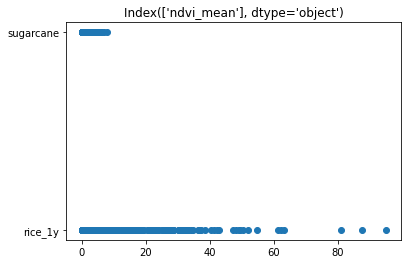

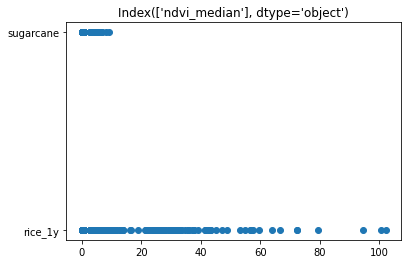

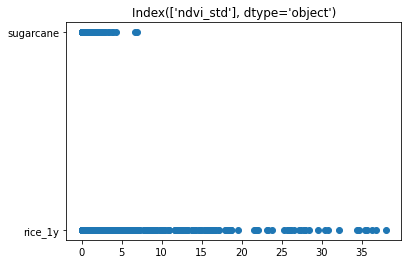

In [55]:
for i in range (14,17):
    plt.scatter(X.iloc[:,[i]], y)
    plt.title(X.iloc[:,[i]].keys())
    plt.show()

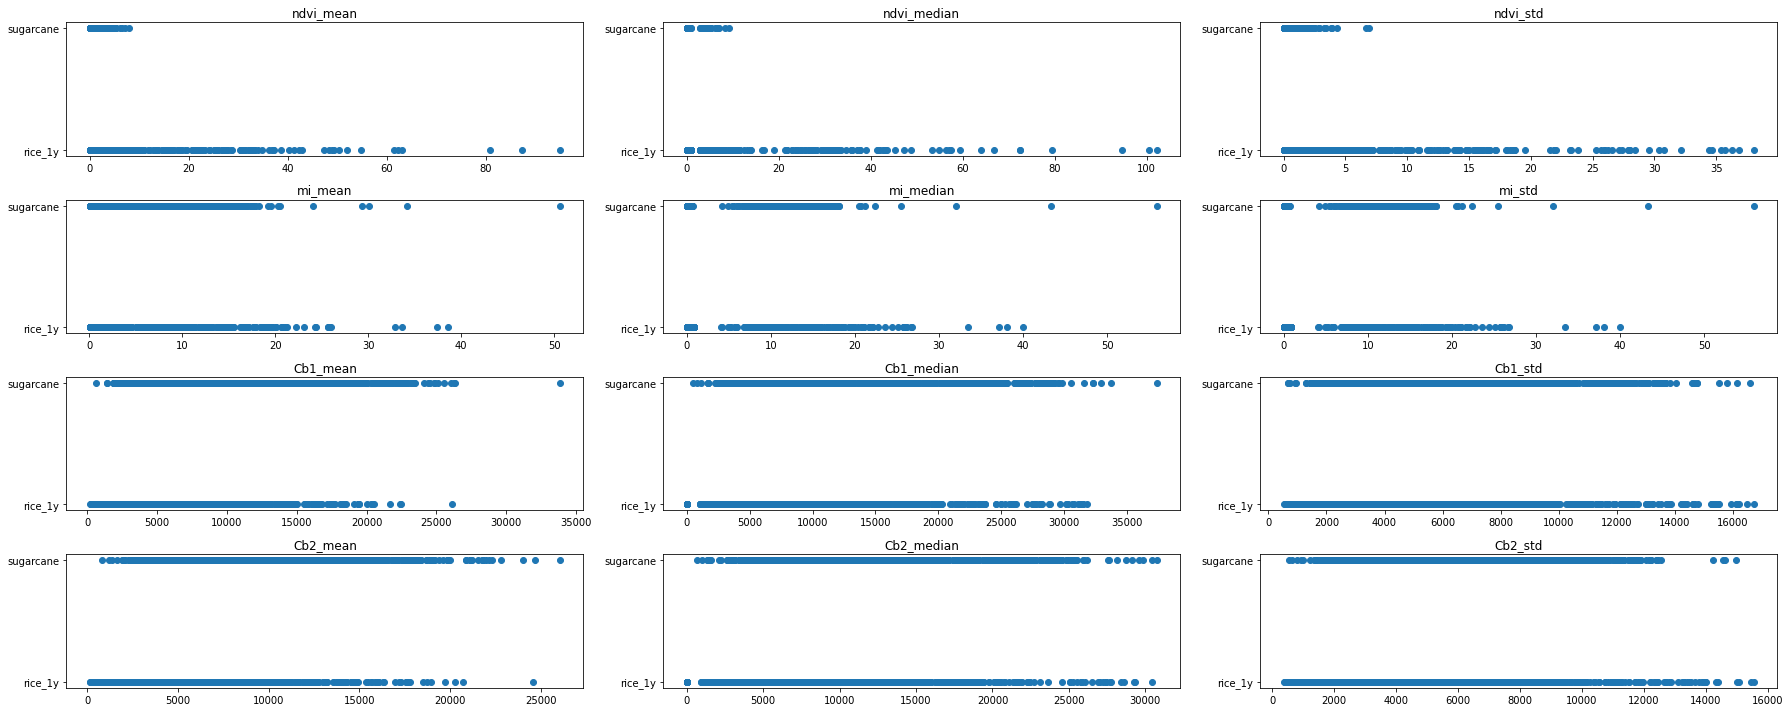

In [56]:
fig, ax = plt.subplots(4, 3, figsize=(25,10), tight_layout=True, )

ax[0,0].scatter(X.iloc[:,[14]], y)
ax[0,0].set_title(df.keys()[14+1])
ax[0,1].scatter(X.iloc[:,[15]], y)
ax[0,1].set_title(df.keys()[15+1])
ax[0,2].scatter(X.iloc[:,[16]], y)
ax[0,2].set_title(df.keys()[16+1])

ax[1,0].scatter(X.iloc[:,[17]], y)
ax[1,0].set_title(df.keys()[17+1])
ax[1,1].scatter(X.iloc[:,[18]], y)
ax[1,1].set_title(df.keys()[18+1])
ax[1,2].scatter(X.iloc[:,[19]], y)
ax[1,2].set_title(df.keys()[19+1])

ax[2,0].scatter(X.iloc[:,[20]], y)
ax[2,0].set_title(df.keys()[20+1])
ax[2,1].scatter(X.iloc[:,[21]], y)
ax[2,1].set_title(df.keys()[21+1])
ax[2,2].scatter(X.iloc[:,[22]], y)
ax[2,2].set_title(df.keys()[22+1])

ax[3,0].scatter(X.iloc[:,[23]], y)
ax[3,0].set_title(df.keys()[23+1])
ax[3,1].scatter(X.iloc[:,[24]], y)
ax[3,1].set_title(df.keys()[24+1])
ax[3,2].scatter(X.iloc[:,[25]], y)
ax[3,2].set_title(df.keys()[25+1])

plt.show()

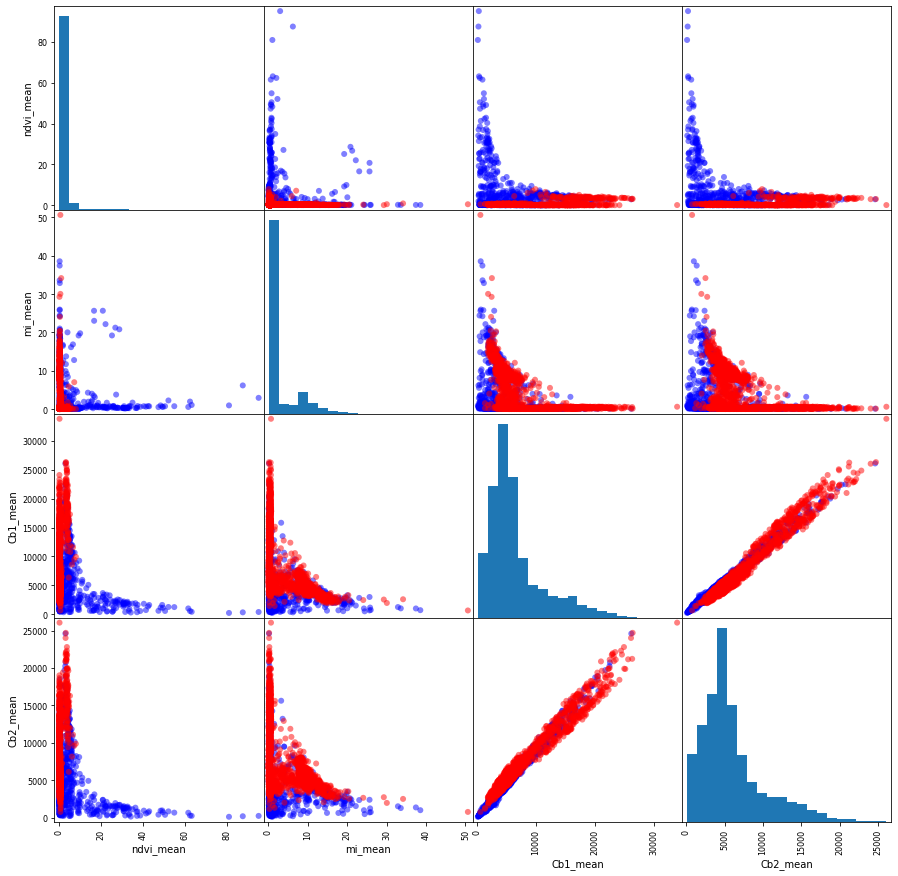

In [57]:
pd.plotting.scatter_matrix(X.iloc[:,[14,17,20,23]], color=['red' if t == 'sugarcane' else 'blue' for t in y], figsize=(15,15), marker='o', hist_kwds={'bins':20}); #hue=y

In [58]:
#Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_new = X.iloc[:,[14,17,20,23]]
scores = cross_val_score(logreg, X_new, y, cv=5)
scores.std(), scores.mean()

(0.008972897567192707, 0.7355091978692476)

In [59]:
X_new = X.iloc[:,[14,15,16,17,18,19,20,21,22,23]]
scores = cross_val_score(logreg, X_new, y, cv=5)
scores.mean()

/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

0.8070630157710307

---

# NEXT TO DO
Learning Curve 
might need to fix datset. Overfit=too complicated > random forest, underfit=too simple> add more features



----

In [60]:
# # field, date, mean_11, std_1, mean2,std_2 etc.
# def caculate(array):
#     for band in array:
#         print(band)
#         b_min = band.min()
#         b_mean = band.mean()
#         b_median= np.median(band)
#         b_max = band.max()
#         print(b_max)

In [61]:
def caculate(array):
    for band in array:
        b_mean = band.mean()

In [62]:
# df.X.shape

In [63]:
# df['mean'] = df['X'].apply(caculate)
# df

In [64]:
# df.X[0].shape

In [65]:
# mean_1 = np.mean(df.X[0][0])
# mean_1
# mean_2 = np.mean(df.X[0][1])
# mean_2

In [66]:
# show(df.X[0][:,:,12])